In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print('Pandas Version: ',pd.__version__)
pd.set_option("display.max.columns",None) # setting pandas to display all columns
pd.set_option("display.precision",2) # setting pandas to trim float values to 2 decimal places

Pandas Version:  1.2.4


In [3]:
import requests
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"
response = requests.get(download_url)

In [4]:
response.status_code

200

In [5]:
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [6]:
nba = pd.read_csv('nba_all_elo.csv')
len(nba) # the dataset contains 126314 rows
nba.shape # the dataset contains 126314 rows and 23 columns

(126314, 23)

In [7]:
nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [8]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [9]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [10]:
nba.describe(include='object')

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,197302200CLE,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [11]:
display(nba['team_id'].value_counts())
display(nba['team_id'].unique())

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
TRH      60
PIT      60
INJ      60
DTF      60
SDS      11
Name: team_id, Length: 104, dtype: int64

array(['TRH', 'NYK', 'CHS', 'DTF', 'WSC', 'BOS', 'PRO', 'PIT', 'STB',
       'CLR', 'PHW', 'BLB', 'INJ', 'FTW', 'MNL', 'ROC', 'TRI', 'DNN',
       'INO', 'SHE', 'WAT', 'AND', 'SYR', 'MLH', 'STL', 'DET', 'CIN',
       'LAL', 'CHP', 'CHZ', 'SFW', 'BAL', 'PHI', 'CHI', 'SEA', 'OAK',
       'ANA', 'SDR', 'KEN', 'INA', 'DNR', 'DLC', 'HSM', 'NOB', 'MNM',
       'NJA', 'PTP', 'ATL', 'MIL', 'PHO', 'NYA', 'MMF', 'MNP', 'LAS',
       'CAR', 'WSA', 'BUF', 'CLE', 'UTS', 'FLO', 'PTC', 'POR', 'VIR',
       'TEX', 'MMP', 'HOU', 'GSW', 'KCO', 'MMT', 'SDA', 'CAP', 'SAA',
       'NOJ', 'DNA', 'SSL', 'MMS', 'WSB', 'KCK', 'SDS', 'IND', 'NYN',
       'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [12]:
display(nba['fran_id'].value_counts())
display(nba['fran_id'].unique())

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

array(['Huskies', 'Knicks', 'Stags', 'Falcons', 'Capitols', 'Celtics',
       'Steamrollers', 'Ironmen', 'Bombers', 'Rebels', 'Warriors',
       'Baltimore', 'Jets', 'Pistons', 'Lakers', 'Kings', 'Hawks',
       'Denver', 'Olympians', 'Redskins', 'Waterloo', 'Packers', 'Sixers',
       'Wizards', 'Bulls', 'Thunder', 'Squires', 'Stars', 'Rockets',
       'Colonels', 'Pacers', 'Nuggets', 'Spurs', 'Spirits', 'Sounds',
       'Floridians', 'Nets', 'Condors', 'Bucks', 'Suns', 'Clippers',
       'Cavaliers', 'Trailblazers', 'Sails', 'Jazz', 'Mavericks',
       'Pelicans', 'Heat', 'Timberwolves', 'Magic', 'Grizzlies',
       'Raptors', 'Hornets'], dtype=object)

In [13]:
nba.loc[nba['fran_id']=='Lakers','team_id'].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [14]:
nba['date_game'] = pd.to_datetime(nba['date_game'])
nba.loc[nba['team_id'] == 'MNL','date_game'].min()
nba[nba['team_id']=='MNL']['date_game'].max()
nba[nba['team_id']=='MNL']['date_game'].agg((min,max))

min   1948-11-04
max   1960-03-26
Name: date_game, dtype: datetime64[ns]

In [15]:
# nba[nba['team_id']=='BOS']['pts'].sum()
nba.loc[nba['team_id']=='BOS','pts'].sum()

626484

In [16]:
revenues = pd.Series([5555,7000,1980])
type(revenues)
# display(revenues)
revenues.values
revenues.index
type(revenues.index)
type(revenues.values)

numpy.ndarray

In [17]:
city_revenues = pd.Series([4200,8000,9000],index=["Mumbai","Banglore",'Hyderabad'])
city_revenues
city_revenues.index
city_revenues.values
type(city_revenues.index)
type(city_revenues.values)

numpy.ndarray

In [18]:
city_employee_count = pd.Series({'Hyderabad':1000,'Mumbai':1600})
city_employee_count
city_employee_count.index
city_employee_count.values
city_employee_count.keys()
list(city_employee_count.items())
'Hyderabad' in city_employee_count
'Banglore' in city_employee_count

False

In [19]:
city_data = pd.DataFrame({'revenue':city_revenues, 'employee_count':city_employee_count})
display(city_data)
city_data.index
city_data.axes[1]
'revenue' in city_data

,revenue,employee_count
Banglore,8000,NaN
Hyderabad,9000,1000.0
Mumbai,4200,1600.0


True

In [20]:
nba.axes
'pts' in nba.keys()

True

In [21]:
nba.iloc[[-2]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [22]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [23]:
nba.loc[5555:5559,['team_id','opp_id','opp_fran','opp_pts']]

,team_id,opp_id,opp_fran,opp_pts
5555,FTW,PHW,Warriors,56
5556,BOS,NYK,Knicks,74
5557,NYK,BOS,Celtics,95
5558,ROC,SYR,Sixers,86
5559,SYR,ROC,Kings,81


In [24]:
current_decade = nba.loc[nba['year_id']> 2010]
current_decade.shape

(12658, 23)

In [25]:
games_with_notes = nba[nba['notes'].notnull()]
games_with_notes.shape

(5424, 23)

In [26]:
games_with_notes_na = nba[nba['notes'].notna()]
games_with_notes_na.shape

(5424, 23)

In [27]:
ers = nba[nba['fran_id'].str.endswith("ers")][['fran_id']]
ers.shape

(27797, 1)

In [28]:
nba[(nba['team_id']=='BLB') & (nba['pts'] > 100) & (nba['opp_pts']>100) & (nba['_iscopy']==0)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,1949-02-26,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1953-01-10,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1953-01-14,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,1953-03-11,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,1954-02-22,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [29]:
nba[
    (nba['team_id'].str.startswith('LA'))&
    (nba['year_id'] == 1992)&
    (nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,1992-05-03,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,1992-05-03,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


In [30]:
city_revenues.agg((sum,max))

sum    21200
max     9000
dtype: int64

In [31]:
nba['pts'].agg((sum,min,max))

sum    12976235
min           0
max         186
Name: pts, dtype: int64

In [32]:
nba.groupby('team_id')['pts'].agg((sum,max,min))

,sum,max,min
team_id,,,
ANA,8704,147,85
AND,6193,123,50
ATL,411248,155,58
BAL,98112,156,79
BLB,37219,126,50
...,...,...,...
WAS,142413,147,63
WAT,4921,104,59
WSA,10774,162,91


In [33]:
nba[
    (nba['fran_id'] == 'Spurs') & (nba['year_id'] > 2010)].groupby(['year_id','game_result'])['game_id'].count()


year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [34]:
nba[
    (nba['fran_id'] == 'Warriors')&(nba['year_id'] == 2015)
].groupby(['is_playoffs','game_result'])['game_id'].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

In [35]:
df = nba.copy()
df.shape

(126314, 23)

In [36]:
df['difference'] = df['pts']-df['opp_pts']
df.shape

(126314, 24)

In [37]:
df['difference'].agg(('count','min','max','sum','mean'))

count    126314.0
min         -68.0
max          68.0
sum           0.0
mean          0.0
Name: difference, dtype: float64

In [38]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [39]:
nba.rename(columns={'game_result':'result', 'game_location':'location'}, inplace=True)

In [40]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  datetime64[ns]
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

In [41]:
nba.drop(['elo_i','elo_n','opp_elo_i','opp_elo_n'], axis=1, inplace=True)

In [42]:
nba.shape

(126314, 19)

In [43]:
df['date_game'] = pd.to_numeric(df['date_game'], errors='raise')

In [44]:
df['game_location'].nunique()

3

In [45]:
df['fran_id'].nunique()

53

In [46]:
df['game_location'].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [47]:
df['game_location'] = pd.Categorical(df['game_location'])

In [48]:
display(df['game_location'].dtype)
display(type(df['game_location']))

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

pandas.core.series.Series

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   gameorder      126314 non-null  int64   
 1   game_id        126314 non-null  object  
 2   lg_id          126314 non-null  object  
 3   _iscopy        126314 non-null  int64   
 4   year_id        126314 non-null  int64   
 5   date_game      126314 non-null  int64   
 6   seasongame     126314 non-null  int64   
 7   is_playoffs    126314 non-null  int64   
 8   team_id        126314 non-null  object  
 9   fran_id        126314 non-null  object  
 10  pts            126314 non-null  int64   
 11  elo_i          126314 non-null  float64 
 12  elo_n          126314 non-null  float64 
 13  win_equiv      126314 non-null  float64 
 14  opp_id         126314 non-null  object  
 15  opp_fran       126314 non-null  object  
 16  opp_pts        126314 non-null  int64   
 17  opp_elo_i 

In [50]:
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,-731116800000000000,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,-731116800000000000,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,-731030400000000000,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,-731030400000000000,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,-731030400000000000,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,1433980800000000000,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,1434240000000000000,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,1434240000000000000,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,1434412800000000000,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN,-8


In [51]:
dfna = df.dropna(axis=1)
dfna.shape
# df.shape

(126314, 23)

In [52]:
nba2 = nba.copy()
nba2['notes'].fillna('-', inplace=True)
nba2

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,location,result,forecast,notes
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,-
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,-
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,-
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,-
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.31,GSW,Warriors,103,H,L,0.55,-
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.01,CLE,Cavaliers,91,H,W,0.77,-
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.01,GSW,Warriors,104,A,L,0.23,-
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.29,GSW,Warriors,105,H,L,0.48,-


In [53]:
nba2.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,41.71,102.73,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,10.63,14.81,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,10.15,0.00,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,34.10,93.00,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,42.11,103.00,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,49.64,112.00,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,71.11,186.00,0.98


In [55]:
nba[(nba['pts']>nba['opp_pts']) & (nba['result'] != 'W')].empty

True

In [56]:
nba[(nba['pts']<nba['opp_pts']) & (nba['result'] != 'L')].empty

True

In [57]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"]
)

In [58]:
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [59]:
city_data

,revenue,employee_count
Banglore,8000,NaN
Hyderabad,9000,1000.0
Mumbai,4200,1600.0


In [60]:
all_city_data = pd.concat([city_data,further_city_data], sort=True)

In [61]:
all_city_data

,employee_count,revenue
Banglore,NaN,8000
Hyderabad,1000.0,9000
Mumbai,1600.0,4200
New York,2.0,7000
Barcelona,2.0,3400


In [62]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [63]:
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [64]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False, join='inner')
cities

,employee_count,revenue,country,capital
Barcelona,2.0,3400,Spain,0


<AxesSubplot:xlabel='year_id'>

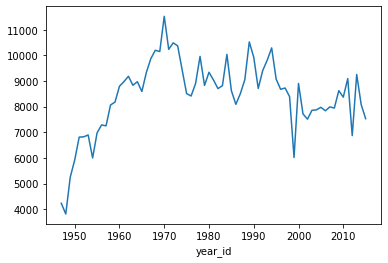

In [65]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

<AxesSubplot:>

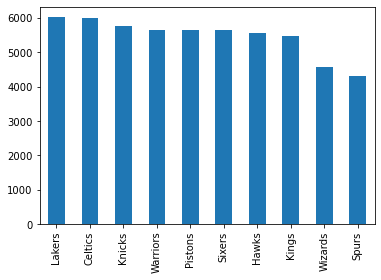

In [66]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:ylabel='result'>

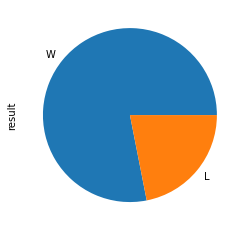

In [67]:
nba[(nba['fran_id']=='Heat') & (nba['year_id'] == 2013)]['result'].value_counts().plot(kind='pie')